In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\archive\Placement_Data_Full_Class.csv")

In [41]:
df.shape

(215, 15)

In [42]:
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [43]:
df.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [44]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

## Preprocessing

## ENcoding

In [45]:
df['gender']=df.gender.map({'M':0,'F':1})
df['workex']=df.workex.map({'No':0,'Yes':1})
df['status']=df.status.map({'Not Placed':0,'Placed':1})
df['specialisation']=df.specialisation.map({'Mkt&HR':0,'Mkt&Fin':1})

In [46]:
df

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,212,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,213,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,214,1,74.00,66.00,58.00,0,70.0,0,60.23,1


## Balance dataset

In [47]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [48]:
from sklearn.utils import resample

# seperate the majority and minority classes
data_majority=df[df['status']==1]
data_minority=df[df['status']==0]

#Upsample minority class

data_minority_unsample=resample(data_minority,
                                replace=True,
                                n_samples=len(data_majority), # to match majority class
                                random_state=42
                                )
#
balanced_data=pd.concat([data_majority,data_minority_unsample])


In [49]:
balanced_data

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.00,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.50,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.00,1,57.80,1
4,5,0,85.80,73.60,73.30,0,96.80,1,55.50,1
7,8,0,82.00,64.00,66.00,1,67.00,1,62.14,1
...,...,...,...,...,...,...,...,...,...,...
100,101,1,45.00,57.00,58.00,1,56.39,0,64.95,0
173,174,1,52.00,52.00,55.00,0,67.00,0,59.32,0
194,195,0,52.00,55.00,56.30,0,59.00,1,64.74,0
186,187,1,52.00,64.00,61.00,0,55.00,1,62.93,0


In [50]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

# Train Test Split

In [51]:
from matplotlib import axis


X=balanced_data.copy().drop('status',axis=1)
y=balanced_data['status']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 20% test data
    random_state=42     # for reproducibility        
)

In [53]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((207, 9), (207,), (89, 9), (89,))

In [54]:
X_train

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
101,102,0,63.0,72.0,68.00,0,78.00,0,60.44
158,159,0,67.0,63.0,64.00,0,60.00,1,61.87
65,66,0,54.0,47.0,57.00,0,89.69,0,57.10
180,181,0,65.0,71.5,62.80,1,57.00,1,56.60
206,207,0,41.0,42.0,60.00,0,97.00,1,53.39
...,...,...,...,...,...,...,...,...,...
175,176,0,63.0,62.0,65.00,0,87.50,0,60.69
103,104,0,73.0,78.0,73.00,1,85.00,0,65.83
147,148,0,70.0,74.0,65.00,0,83.00,1,62.28
194,195,0,52.0,55.0,56.30,0,59.00,1,64.74


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# K-nearest neighbour

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

knn_y_pred=knn.predict(X_test)

Knn_accuracy=accuracy_score(y_test,knn_y_pred)
Knn_accuracy

0.8539325842696629

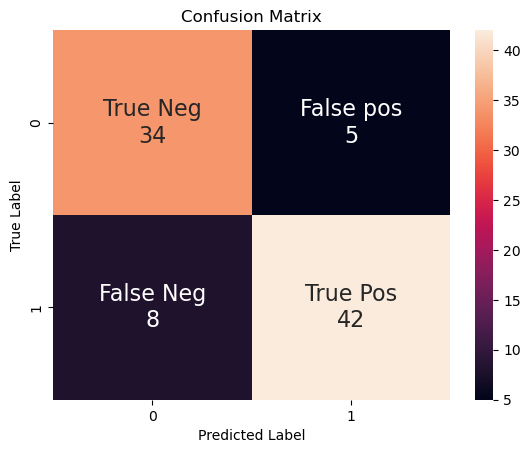

In [57]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,knn_y_pred)

fig=plt.Figure(figsize=(10,7))
group_names=['True Neg','False pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels=[f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels=np.asarray(labels).reshape(2,2)


sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree

In [58]:
 #Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, y_test)
decision_tree_accuracy

0.8202247191011236

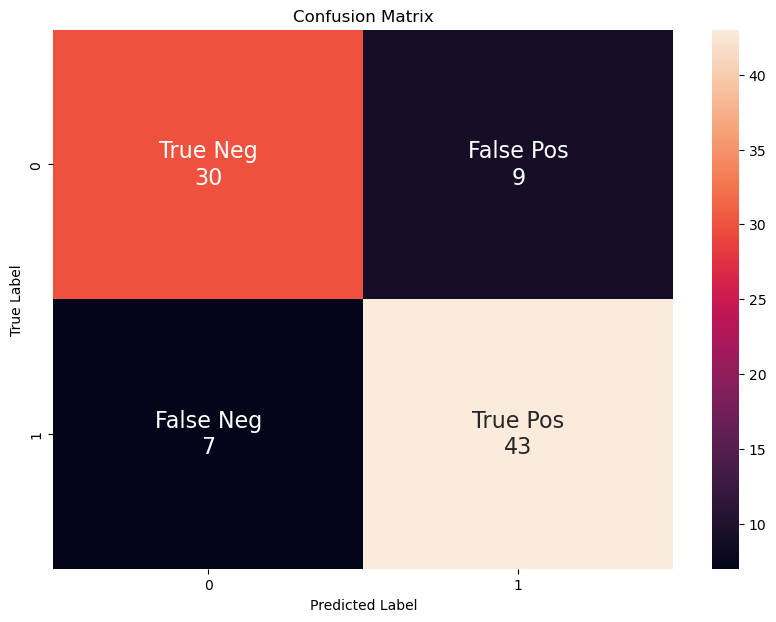

In [59]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(y_test, decision_tree_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM

In [68]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_test, y_test)
svc_accuracy

0.8876404494382022

Text(95.72222222222221, 0.5, 'True Label')

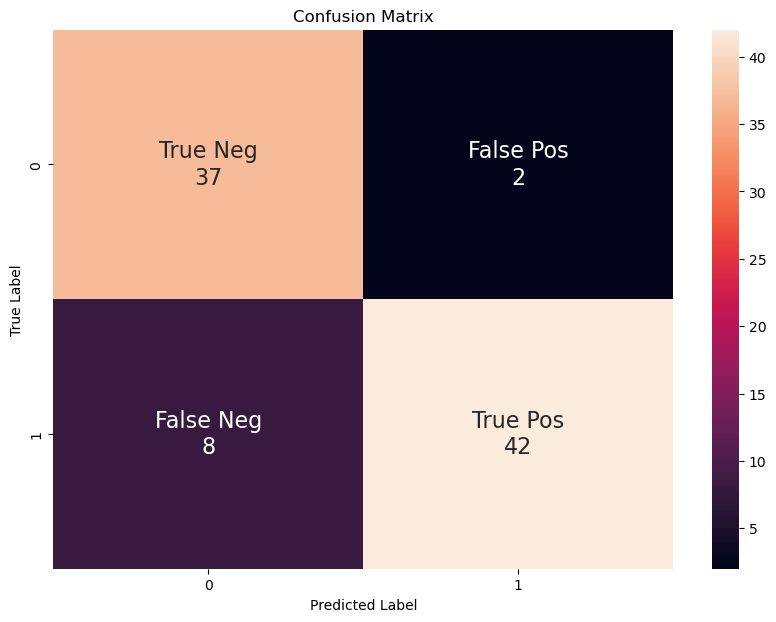

In [61]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(y_test, svm_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Random Forest

In [69]:

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_accuracy = random_forest.score(X_test, y_test)
random_forest_accuracy

0.8764044943820225

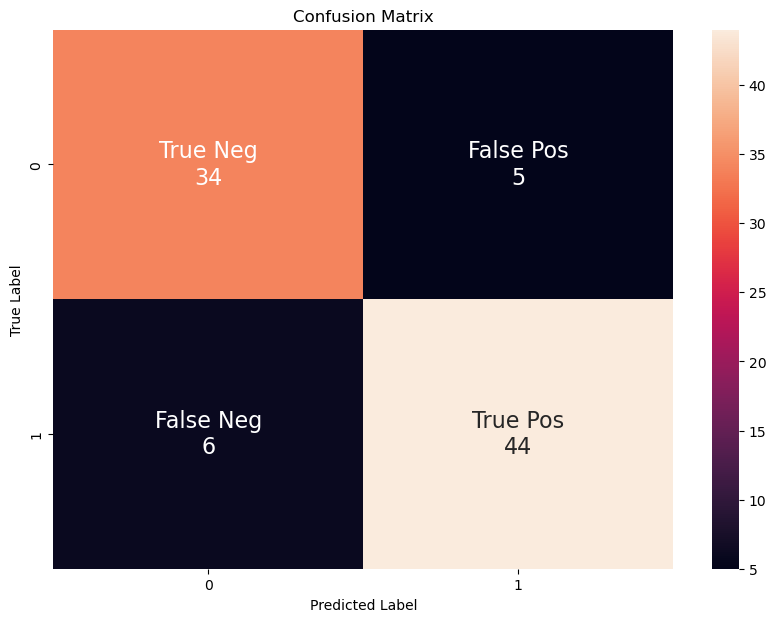

In [70]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Gaussian Naive Bayes

In [65]:

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_test, y_test)
gaussian_accuracy

0.797752808988764

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_Y_pred = lg.predict(X_test)
lg_accuracy = lg.score(X_test, y_test)
lg_accuracy

0.8089887640449438